# Import libraries and initialize the make_moons dataset.

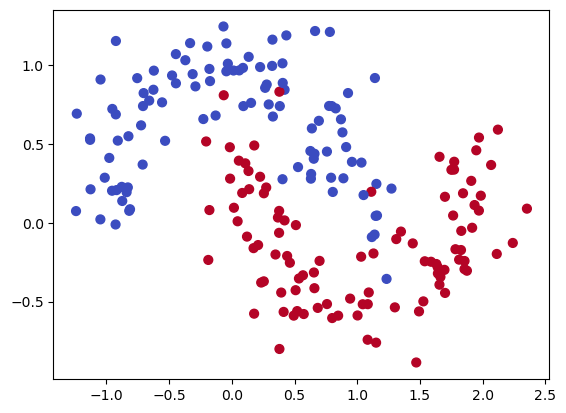

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

x,y = sklearn.datasets.make_moons(200, noise = 0.20)

plt.scatter(x[:,0], x[:,1], s = 40, c = y, cmap = plt.cm.coolwarm)
plt.show()

# Changing input and output to tensor (as done in Section 10)

In [32]:
x = torch.FloatTensor(x)
y = torch.LongTensor(y)
print(x.shape, y.shape)

torch.Size([200, 2]) torch.Size([200])


# Define the network, optimization algorithm and loss function

In [33]:
class FeedForward(torch.nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden = nn.Linear(input_neurons, hidden_neurons)
        self.out = nn.Linear(hidden_neurons, output_neurons)

    def forward(self, x):
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x
    

network = FeedForward(input_neurons = 2, hidden_neurons=50, output_neurons = 2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)
loss_function = nn.CrossEntropyLoss()

# Plot the accuracy over epoch

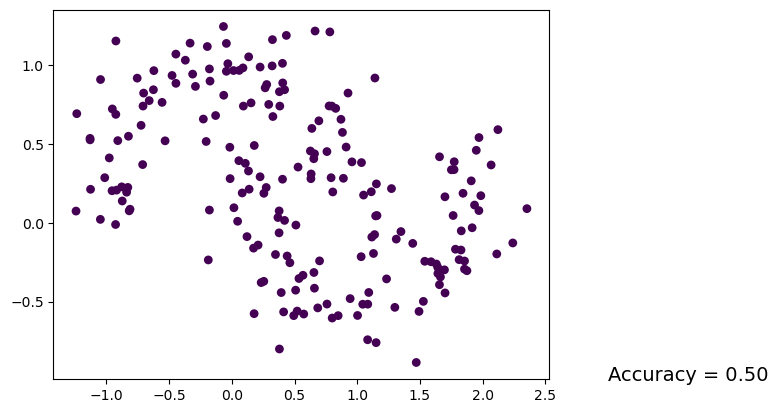

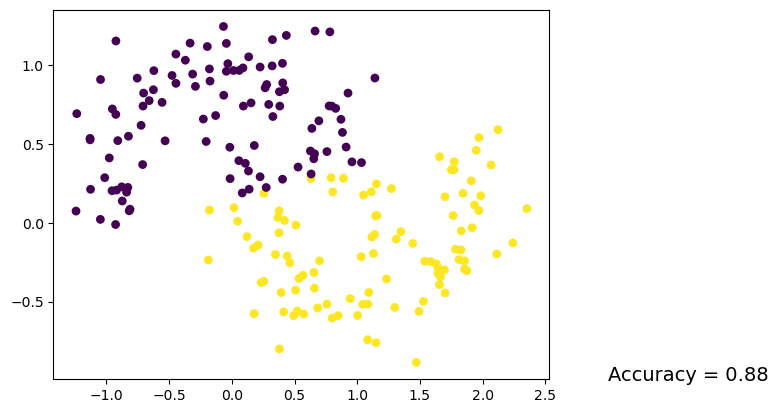

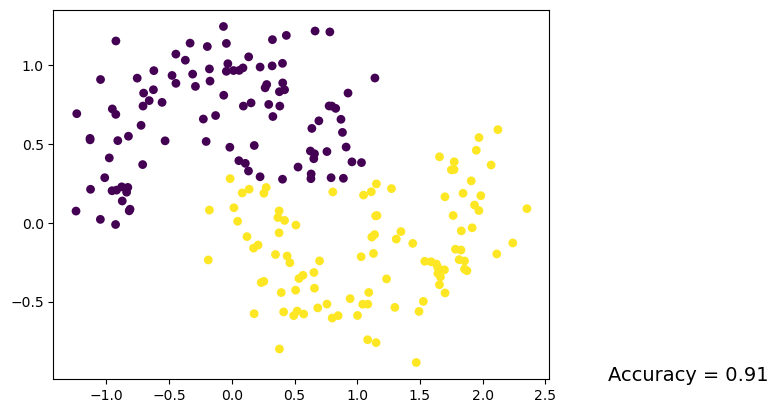

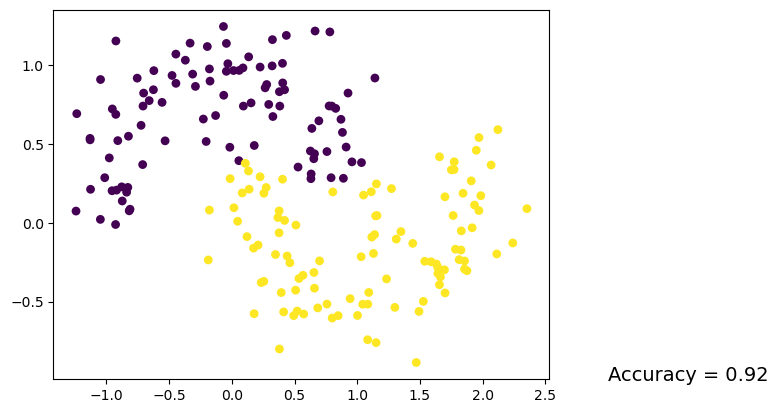

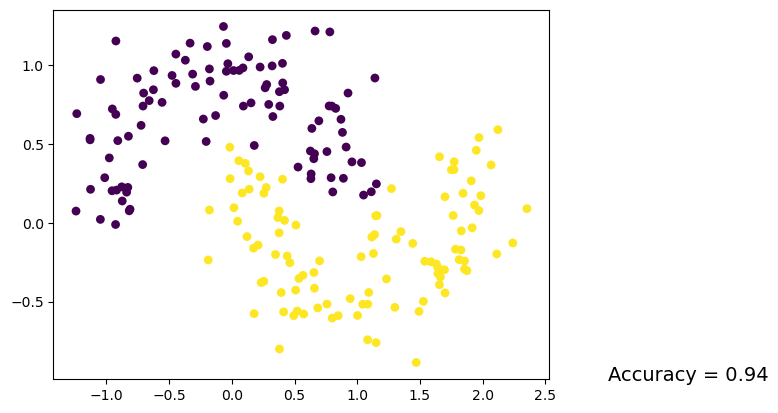

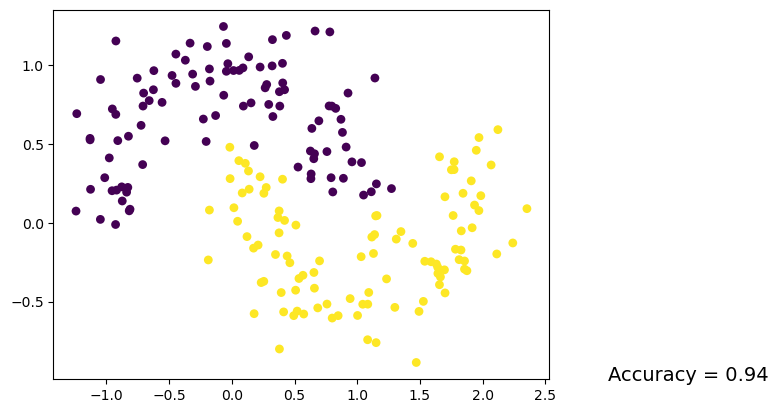

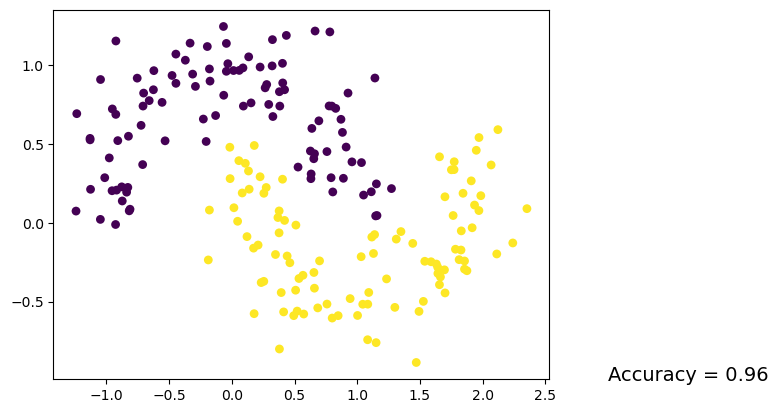

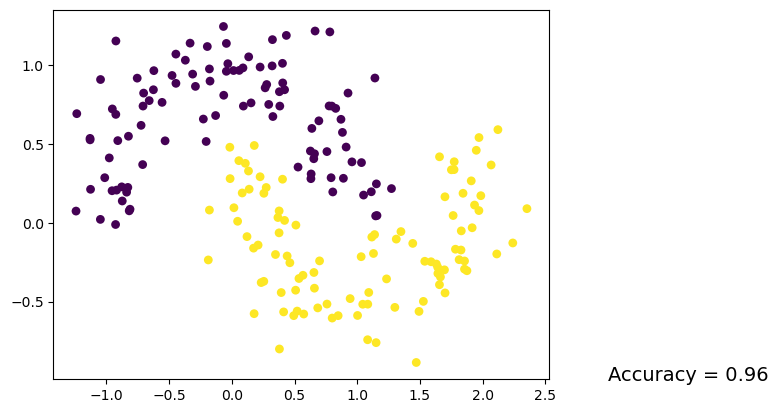

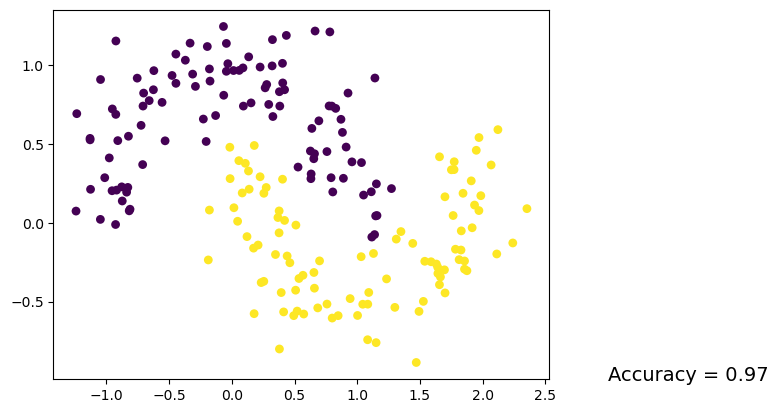

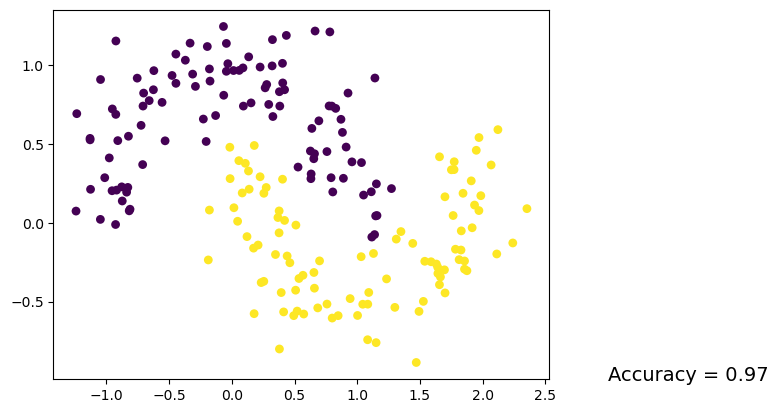

In [34]:
plt.ion()

for epoch in range(10000):
    out = network(x)
    loss = loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        # Show the learning process
        max_value , prediction = torch.max(out, dim = 1) 
            # return the predicted label and it propa
            # For example, [0.1, 0.9, 0.6] -> prediction = class 1 (over 0,1,2) with max_value = 0.9
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], 
                    s = 40, c = predicted_y, lw = 0)
        
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size': 14})
        plt.pause(0.1)

plt.ioff()
plt.show()

